In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
data['SeniorCitizen'].astype("str")
data['SeniorCitizen'].replace({0:"No_Senior_Citizen",1:"Senior_Citizen"},inplace=True)

In [7]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df=data.drop(['customerID'],axis=1)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No_Senior_Citizen,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No_Senior_Citizen,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,No_Senior_Citizen,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No_Senior_Citizen,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No_Senior_Citizen,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No_Senior_Citizen,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,No_Senior_Citizen,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,No_Senior_Citizen,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,Senior_Citizen,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [9]:
#calculating charges
df['Calculate_Charge']=df['MonthlyCharges']*df['tenure']
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Calculate_Charge
0,Female,No_Senior_Citizen,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.85
1,Male,No_Senior_Citizen,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,1936.30
2,Male,No_Senior_Citizen,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,107.70
3,Male,No_Senior_Citizen,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1903.50
4,Female,No_Senior_Citizen,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,141.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No_Senior_Citizen,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,2035.20
7039,Female,No_Senior_Citizen,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,7430.40
7040,Female,No_Senior_Citizen,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,325.60
7041,Male,Senior_Citizen,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,297.60


In [10]:
# converting total charges to numeric
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [11]:
#comparing calculate charges to total charges
df['TotalChargesStatus']=np.where(df['Calculate_Charge']>df['TotalCharges'],"Biggest","Smallest")
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Calculate_Charge,TotalChargesStatus
0,Female,No_Senior_Citizen,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.85,Smallest
1,Male,No_Senior_Citizen,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.50,No,1936.30,Biggest
2,Male,No_Senior_Citizen,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,107.70,Smallest
3,Male,No_Senior_Citizen,No,No,45,No,No phone service,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1903.50,Biggest
4,Female,No_Senior_Citizen,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,141.40,Smallest


In [12]:
colname=[]
for i in list(data.columns):
    if data[i].nunique()<4:
        colname.append(i)  
colname

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'Churn']

In [13]:
for i in colname:
    print(i," : ",df[i].unique())

gender  :  ['Female' 'Male']
SeniorCitizen  :  ['No_Senior_Citizen' 'Senior_Citizen']
Partner  :  ['Yes' 'No']
Dependents  :  ['No' 'Yes']
PhoneService  :  ['No' 'Yes']
MultipleLines  :  ['No phone service' 'No' 'Yes']
InternetService  :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  ['No' 'Yes' 'No internet service']
OnlineBackup  :  ['Yes' 'No' 'No internet service']
DeviceProtection  :  ['No' 'Yes' 'No internet service']
TechSupport  :  ['No' 'Yes' 'No internet service']
StreamingTV  :  ['No' 'Yes' 'No internet service']
StreamingMovies  :  ['No' 'Yes' 'No internet service']
Contract  :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  ['Yes' 'No']
Churn  :  ['No' 'Yes']


In [14]:
for j in colname:
    df[j].replace(['No phone service','No internet service'],'No',inplace=True)

In [15]:
df.drop(['TotalChargesStatus','Calculate_Charge'],axis=1,inplace=True)

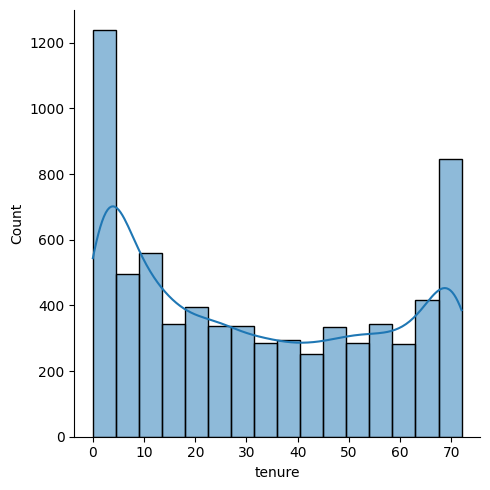

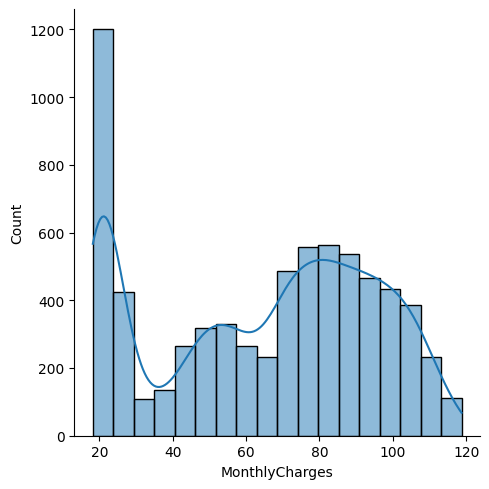

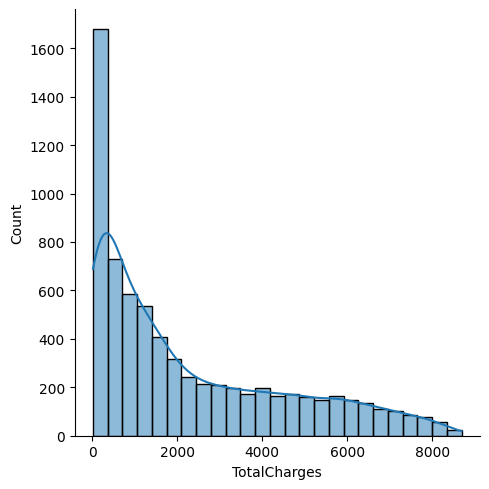

In [16]:
for i in df.columns:
    if df[i].nunique()>4:
        sns.displot(df[i],kde=True)

In [17]:
num=[]
for i in df.columns:
    if df[i].nunique()>4:
           num.append(i)
display(num)

['tenure', 'MonthlyCharges', 'TotalCharges']

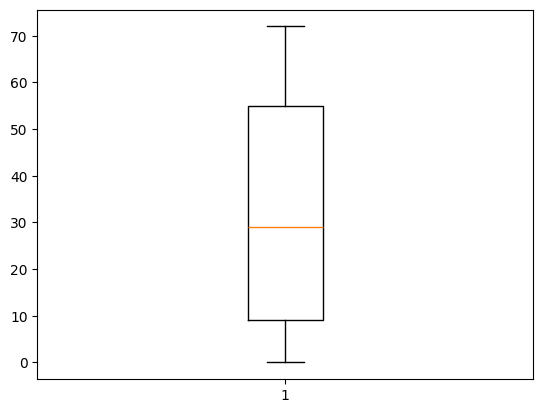

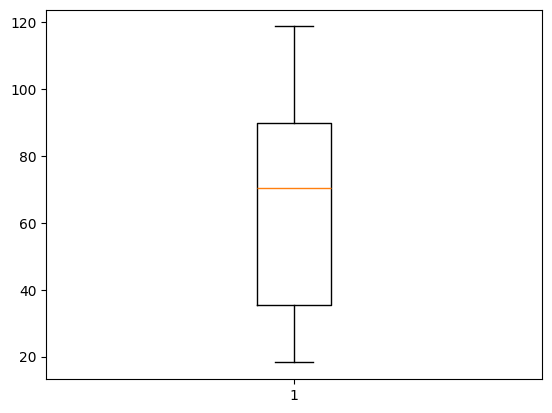

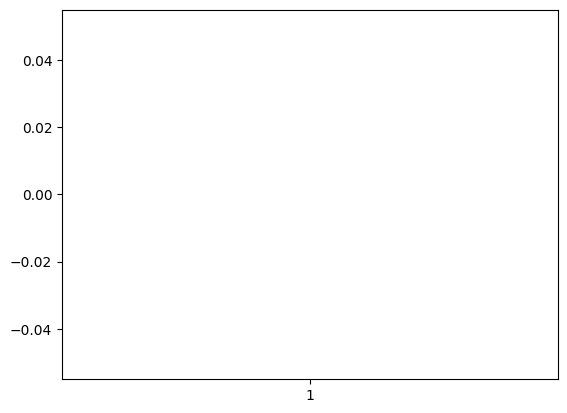

In [18]:
for i in num:
    plt.boxplot(df[i])
    plt.show()

In [19]:
cat=[]
for i in df.columns:
    if df[i].nunique()<=4:
        cat.append(i)
cat

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [20]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
h=[]

for i in cat:
    if df[i].nunique()<=4:
        v=le.fit_transform(df[i])
        h.append(v)
display(h)

[array([0, 1, 1, ..., 0, 1, 1]),
 array([0, 0, 0, ..., 0, 1, 0]),
 array([1, 0, 0, ..., 1, 1, 0]),
 array([0, 0, 0, ..., 1, 0, 0]),
 array([0, 1, 1, ..., 0, 1, 1]),
 array([0, 0, 0, ..., 0, 1, 0]),
 array([0, 0, 0, ..., 0, 1, 1]),
 array([0, 1, 1, ..., 1, 0, 1]),
 array([1, 0, 1, ..., 0, 0, 0]),
 array([0, 1, 0, ..., 0, 0, 1]),
 array([0, 0, 0, ..., 0, 0, 1]),
 array([0, 0, 0, ..., 0, 0, 1]),
 array([0, 0, 0, ..., 0, 0, 1]),
 array([0, 1, 0, ..., 0, 0, 2]),
 array([1, 0, 1, ..., 1, 1, 1]),
 array([2, 3, 3, ..., 2, 3, 0]),
 array([0, 0, 1, ..., 0, 1, 0])]

In [21]:
fdf=pd.DataFrame(h,index=cat).T
fdf

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,2,0
1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,3,0
2,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,3,1
3,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,1,0,1,0,1,1,1,1,1,1,3,0
7039,0,0,1,1,1,1,1,0,1,1,0,1,1,1,1,1,0
7040,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,2,0
7041,1,1,1,0,1,1,1,0,0,0,0,0,0,0,1,3,1


In [22]:
fdf.nunique()

gender              2
SeniorCitizen       2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       2
InternetService     3
OnlineSecurity      2
OnlineBackup        2
DeviceProtection    2
TechSupport         2
StreamingTV         2
StreamingMovies     2
Contract            3
PaperlessBilling    2
PaymentMethod       4
Churn               2
dtype: int64

In [23]:
df.drop(['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn'],axis=1,inplace=True)

In [24]:
a=[df,fdf]
#df.reset_index(inplace=True)
##fdf.reset_index(inplace=True)

In [25]:
df=pd.concat(a,axis=1)
df.TotalCharges=pd.to_numeric(df.TotalCharges, errors='coerce')

In [26]:
df.corr()

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
tenure,1.000000,0.247900,0.825880,0.005106,0.016567,0.379697,0.159712,0.008448,0.331941,-0.030359,0.327203,0.360277,0.360653,0.324221,0.279756,0.286111,0.671607,0.006152,-0.370436,-0.352229
MonthlyCharges,0.247900,1.000000,0.651065,-0.014569,0.220173,0.096848,-0.113890,0.247398,0.490434,-0.323260,0.296594,0.441780,0.482692,0.338304,0.629603,0.627429,-0.074195,0.352150,-0.193407,0.193356
TotalCharges,0.825880,0.651065,1.000000,0.000048,0.102411,0.319072,0.064653,0.113008,0.469042,-0.175691,0.412619,0.510100,0.522881,0.432868,0.515709,0.519867,0.450306,0.157830,-0.330594,-0.199484
gender,0.005106,-0.014569,0.000048,1.000000,-0.001874,-0.001808,0.010517,-0.006488,-0.008414,-0.000863,-0.017021,-0.013773,-0.002105,-0.009212,-0.008393,-0.010487,0.000126,-0.011754,0.017352,-0.008612
SeniorCitizen,0.016567,0.220173,0.102411,-0.001874,1.000000,0.016479,-0.211185,0.008576,0.142948,-0.032310,-0.038653,0.066572,0.059428,-0.060625,0.105378,0.120176,-0.142554,0.156530,-0.038551,0.150889
Partner,0.379697,0.096848,0.319072,-0.001808,0.016479,1.000000,0.452676,0.017706,0.142057,0.000891,0.143106,0.141498,0.153786,0.119999,0.124666,0.117412,0.294806,-0.014877,-0.154798,-0.150448
Dependents,0.159712,-0.113890,0.064653,0.010517,-0.211185,0.452676,1.000000,-0.001762,-0.024526,0.044590,0.080972,0.023671,0.013963,0.063268,-0.016558,-0.039741,0.243187,-0.111377,-0.040292,-0.164221
PhoneService,0.008448,0.247398,0.113008,-0.006488,0.008576,0.017706,-0.001762,1.000000,0.279690,0.387436,-0.092893,-0.052312,-0.071227,-0.096340,-0.022574,-0.032959,0.002247,0.016505,-0.004184,0.011942
MultipleLines,0.331941,0.490434,0.469042,-0.008414,0.142948,0.142057,-0.024526,0.279690,1.000000,0.011124,0.098108,0.202237,0.201137,0.100571,0.257152,0.258751,0.107114,0.163530,-0.171026,0.040102
InternetService,-0.030359,-0.323260,-0.175691,-0.000863,-0.032310,0.000891,0.044590,0.387436,0.011124,1.000000,-0.393013,-0.314737,-0.306805,-0.389382,-0.242532,-0.250343,0.099721,-0.138625,0.086140,-0.047291


<Axes: >

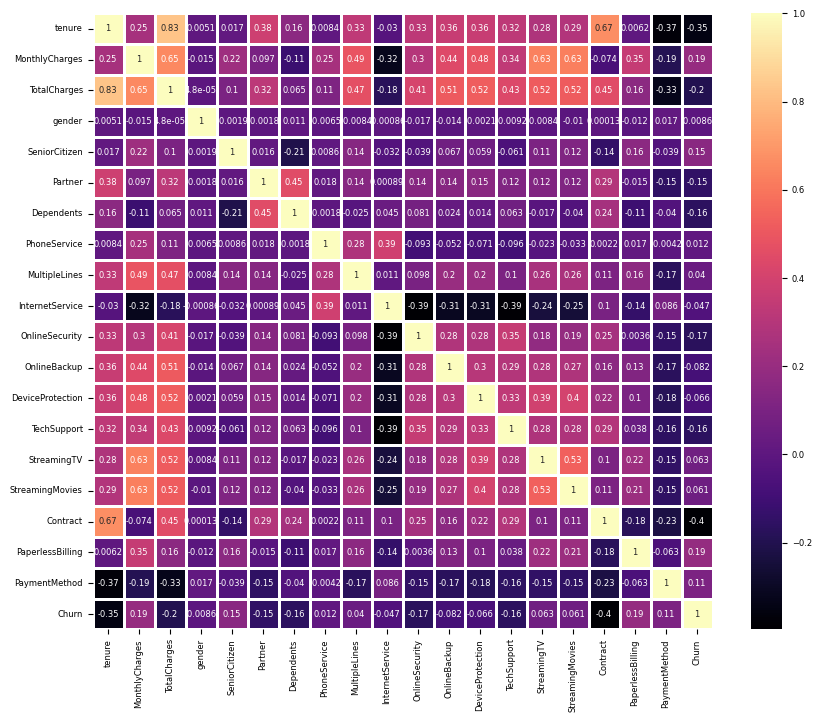

In [27]:
plt.figure(figsize=(10, 8))
plt.rcParams['font.size'] = 6
sns.heatmap(df.corr(),cmap='magma',linecolor='white',linewidths=1,annot=True,)

In [28]:
#Churn Percentage based on gender

data.groupby('gender')['Churn'].value_counts()

gender  Churn
Female  No       2549
        Yes       939
Male    No       2625
        Yes       930
Name: count, dtype: int64

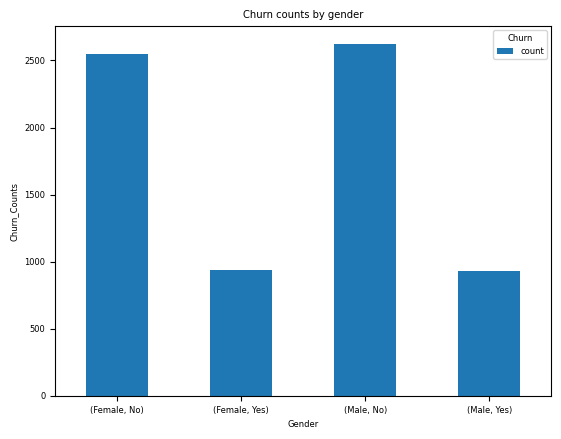

In [29]:
grouped_data = data.groupby('gender')['Churn'].value_counts()
grouped_data.plot(kind='bar')

plt.xlabel('Gender')
plt.ylabel('Churn_Counts')
plt.title('Churn counts by gender')
plt.legend(title='Churn')
plt.xticks(rotation=0)
plt.show()

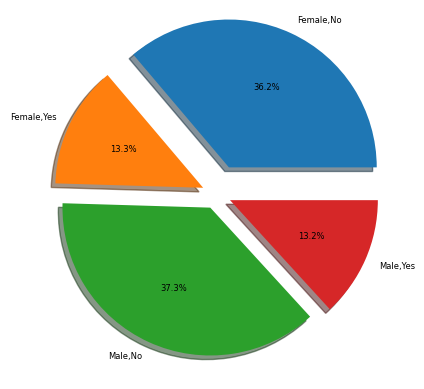

In [30]:
lable=['Female,No','Female,Yes','Male,No','Male,Yes']
my_explode=[0.2,0.1,0.1,0.1]
plt.pie(data.groupby('gender')['Churn'].value_counts(),labels=lable,explode=my_explode,autopct='%1.1f%%',shadow=True)
plt.show()

<Axes: ylabel='count'>

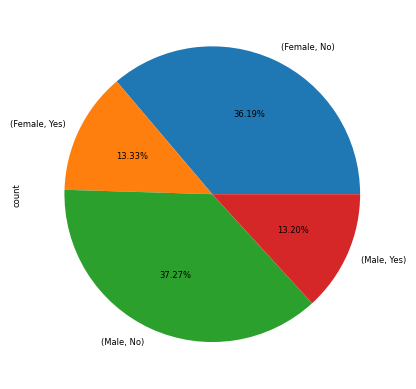

In [31]:
grouped_data.plot(kind='pie',autopct="%.2f%%")

In [32]:
#Churn Percentage based on senior citizen\

data.groupby('SeniorCitizen')['Churn'].value_counts()

SeniorCitizen      Churn
No_Senior_Citizen  No       4508
                   Yes      1393
Senior_Citizen     No        666
                   Yes       476
Name: count, dtype: int64

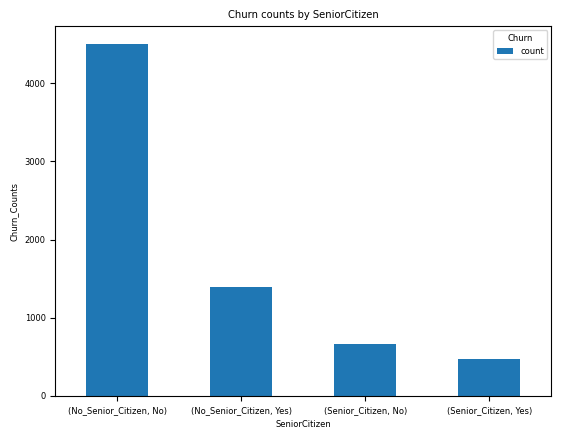

In [33]:
grouped_data1 = data.groupby('SeniorCitizen')['Churn'].value_counts()
grouped_data1.plot(kind='bar')
plt.xlabel('SeniorCitizen')
plt.ylabel('Churn_Counts')
plt.title('Churn counts by SeniorCitizen')
plt.legend(title='Churn')
plt.xticks(rotation=0)
plt.show()

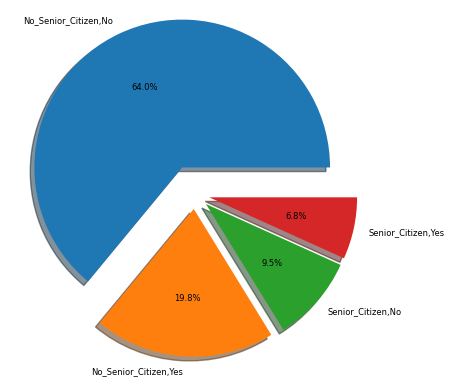

In [34]:
lable1=['No_Senior_Citizen,No','No_Senior_Citizen,Yes','Senior_Citizen,No','Senior_Citizen,Yes']
plt.pie(data.groupby('SeniorCitizen')['Churn'].value_counts(),labels=lable1,explode=my_explode,autopct='%1.1f%%',shadow=True)
plt.show()

In [35]:
#Churn Percentage based on gender and senior citizen

data.groupby(['SeniorCitizen','gender'])['Churn'].value_counts()

SeniorCitizen      gender  Churn
No_Senior_Citizen  Female  No       2221
                           Yes       699
                   Male    No       2287
                           Yes       694
Senior_Citizen     Female  No        328
                           Yes       240
                   Male    No        338
                           Yes       236
Name: count, dtype: int64

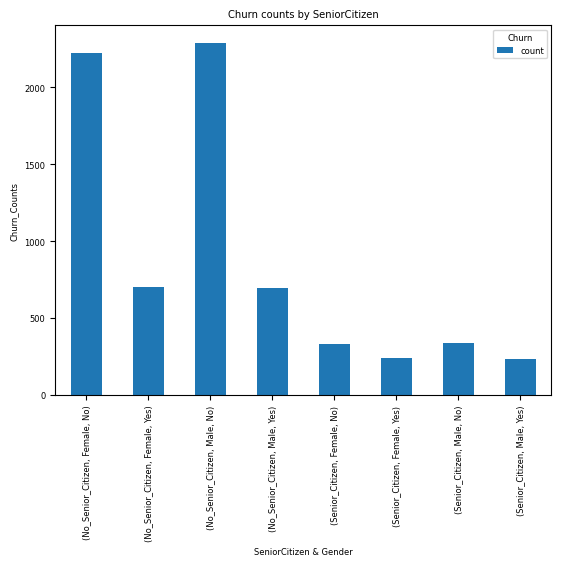

In [36]:
#Churn Percentage based on gender and senior citizen]

grouped_data2 = data.groupby(['SeniorCitizen','gender'])['Churn'].value_counts()
grouped_data2.plot(kind='bar')
plt.xlabel('SeniorCitizen & Gender')
plt.ylabel('Churn_Counts')
plt.title('Churn counts by SeniorCitizen')
plt.legend(title='Churn')

plt.show()  

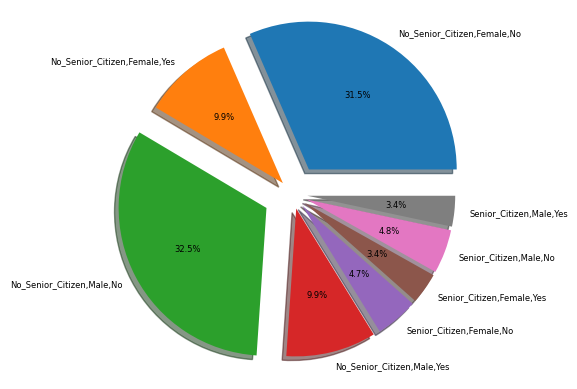

In [54]:
my_explode1=[0.2,0.1,0.2,0.1,0.1,0.1,0.1,0.1]  
lable2=['No_Senior_Citizen,Female,No','No_Senior_Citizen,Female,Yes','No_Senior_Citizen,Male,No','No_Senior_Citizen,Male,Yes','Senior_Citizen,Female,No','Senior_Citizen,Female,Yes','Senior_Citizen,Male,No','Senior_Citizen,Male,Yes']
plt.pie(data.groupby(['SeniorCitizen','gender'])['Churn'].value_counts(),labels=lable2,explode=my_explode1,autopct='%1.1f%%',shadow=True)
plt.show()

<Axes: >

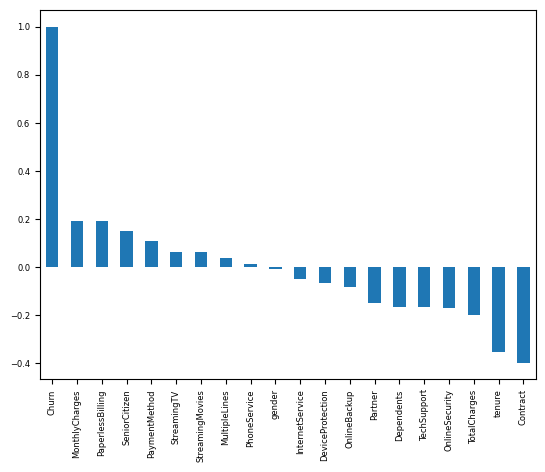

In [38]:
df.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

In [39]:
#Internet Service
#Payment Mathod
#Tech Support
#Contract 
df.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender', 'SeniorCitizen',
       'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

<Axes: xlabel='MonthlyCharges', ylabel='Density'>

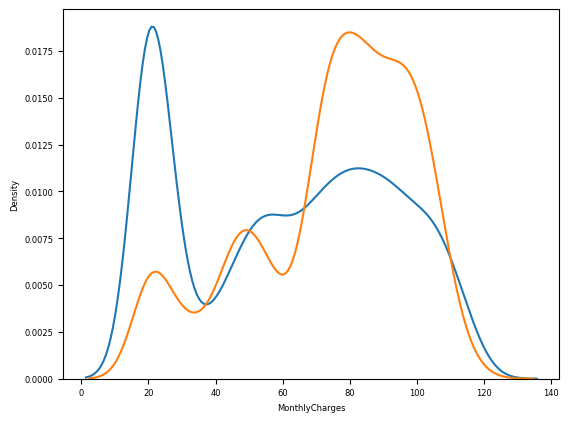

In [41]:
sns.kdeplot(x=df[df['Churn']==0]['MonthlyCharges'])
sns.kdeplot(x=df[df['Churn']==1]['MonthlyCharges'])


Text(0.5, 1.0, 'Churn Over InternetService')

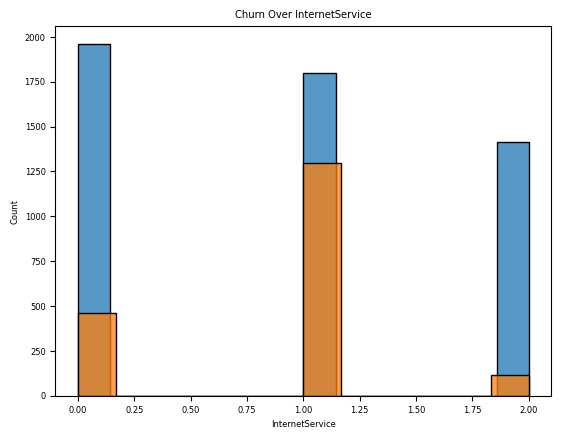

In [49]:
sns.histplot(x=df[df['Churn']==0]['InternetService'])
sns.histplot(x=df[df['Churn']==1]['InternetService'])
plt.title('Churn Over InternetService')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


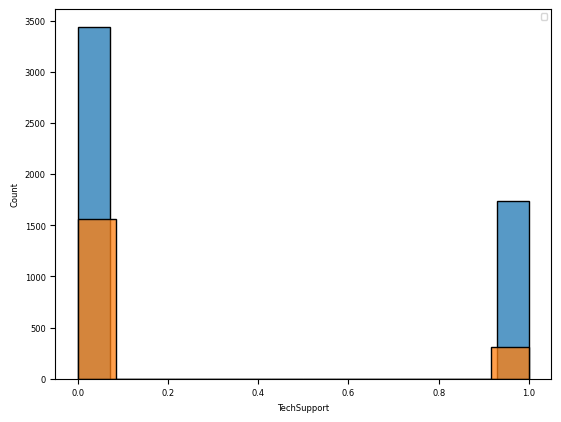

In [44]:
sns.histplot(x=df[df['Churn']==0]['TechSupport'])
sns.histplot(x=df[df['Churn']==1]['TechSupport'])
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


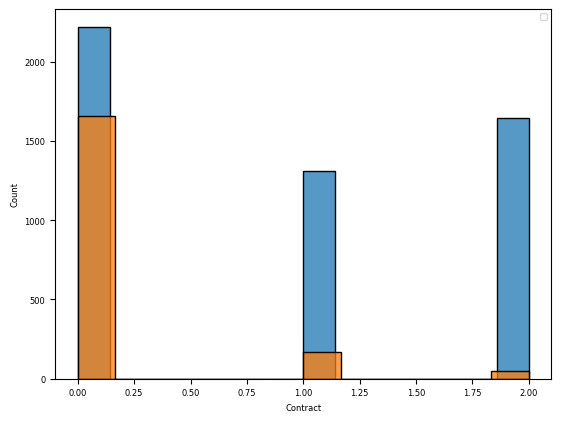

In [46]:
sns.histplot(x=df[df['Churn']==0]['Contract'])
sns.histplot(x=df[df['Churn']==1]['Contract'])
plt.legend()
plt.show()